# **Differential Privacy Examples**

## Cheaters vs. Non-cheaters with a Coin Flip
We will look at an imaginary scenario with basic coin flips. Say we want to estimate what proportion of students cheated on an exam. This is a sensitive question though, and students may feel uncomfortable answering honestly. So we can us DP to estimate while preserving individual privacy.

In [ ]:
import matplotlib.pyplot as plt #matplotlib to graph data
import random #random to implement the coin flip

First, we will see what the data looks like without differential privacy. Our raw data is represented with 0s and 1s, where 0 means "did not cheat," and 1 means "cheated." 

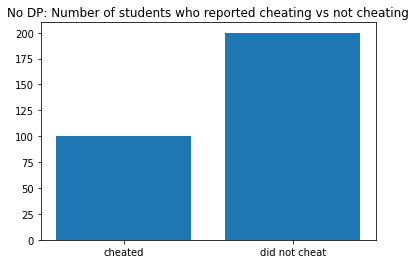

In [ ]:
rawData = [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, \
           1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, \
           0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, \
           1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, \
           0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, \
           0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, \
           1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, \
           0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, \
           1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, \
           0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, \
           0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, \
           1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, \
           0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, \
           1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, \
           0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]

plotData = {'cheated': rawData.count(1), 'did not cheat': rawData.count(0)}
labels = list(plotData.keys())
values = list(plotData.values())

plt.bar(labels, values)
plt.title("No DP: Number of students who reported cheating vs not cheating")
plt.show()

Let's add a new student to the data. Assume that they actually did cheat. Now, run the outputs to see how their data point affects the graph. (Click on the graph if it's too small)

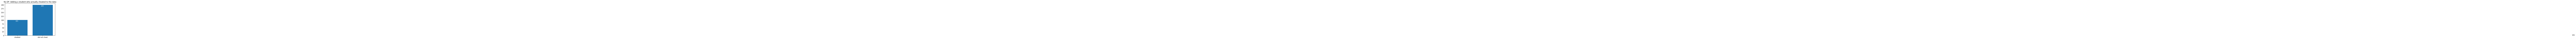

In [ ]:
rawData.append(1) #indicates Student #301 did actually cheat

plotData = {'cheated': rawData.count(1), 'did not cheat': rawData.count(0)}
labels = list(plotData.keys())
values = list(plotData.values())

graph = plt.bar(labels, values)
for bar in graph:
  plt.annotate(bar.get_height(), xy=(bar.get_x()+0.33, bar.get_height()-10), fontsize=10, color="white")
plt.title("No DP: Adding a student who actually cheated to the data")
plt.text(rawData.count(1), 0, str(rawData.count(1)))

plt.show()

In this traditional survey, when we add a student, it's very easy to tell the difference between the two results. If the "cheated" count goes up, the student cheated. If the "did not cheat" count goes up, then they didn't cheat. because the cheated column is now 101 instead of 100, that means student #301 cheated.

To implement DP, each student flips a coin. If it lands on heads, they will truthfully answer. If it lands on tails, they flip another coin. If it lands on heads, they respond that they haven't cheated, and if it lands on tails, they respond that they have cheated.

Run the code multiple times. Notice how the graph changes every time? That's because DP algorithms inject randomness, such as we did with a coin flip.

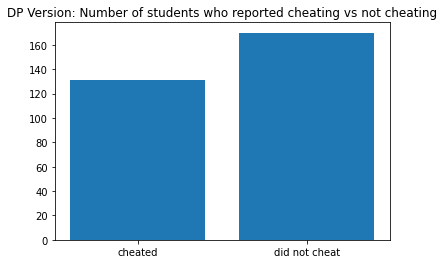

In [ ]:
dpData = []
for each in rawData:
  flip = random.randint(0,1)
  if flip == 0:
    dpData.append(each)
  else:
    dpData.append(random.randint(0,1))

dpPlotData = {'cheated': dpData.count(1), 'did not cheat': dpData.count(0)}

labels = list(dpPlotData.keys())
values = list(dpPlotData.values())

plt.bar(labels, values)
plt.title("DP Version: Number of students who reported cheating vs not cheating")
plt.show()

Now, we can illustrate one of the main purposes of differential privacy: it will not be possible to tell the difference from the results of one dataset versus a parallel one.

Let's add another new student to the data. Assume that they actually did cheat.

In [ ]:
rawData.append(1) #indicates Student #302 did actually cheat

Now, run the outputs to see how their data point affects the graph. Try this multiple times and observe how the graph changes.

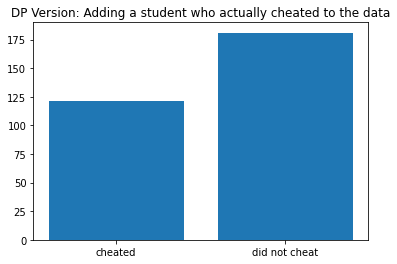

In [ ]:
dpData = []
for each in rawData:
  flip = random.randint(0,1)
  if flip == 0:
    dpData.append(each)
  else:
    dpData.append(random.randint(0,1))

dpPlotData = {'cheated': dpData.count(1), 'did not cheat': dpData.count(0)}

labels = list(dpPlotData.keys())
values = list(dpPlotData.values())

plt.bar(labels, values)
plt.title("DP Version: Adding a student who actually cheated to the data")
plt.show()

As you see, we can't really tell if Student #302 cheated or not because the output results contain a degree of randomness.

Because of the randomness of the algorithm, this is where having a bigger dataset comes in handy. Now assume we have 30000 students instead of 300. Run through the code below. Observe how the DP graph does not significantly change, as the values follow the calculated probabilities.

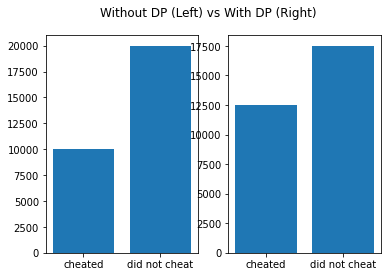

In [ ]:
plotData = {'cheated': 10000, 'did not cheat': 20000}
labels = list(plotData.keys())
values = list(plotData.values())

dpPlotData = {'cheated': 0, 'did not cheat': 0}
for key in plotData:
  for i in range(plotData[key]):
    flip = random.randint(0,1)
    if flip == 0:
      dpPlotData[key] += 1
    else:
      flip = random.randint(0,1)
      if flip == 0:
        dpPlotData['did not cheat'] += 1
      else:
        dpPlotData['cheated'] += 1

dpLabels = list(dpPlotData.keys())
dpValues = list(dpPlotData.values())

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Without DP (Left) vs With DP (Right)')
ax1.bar(labels, values)
ax2.bar(dpLabels, dpValues)
fig.show()

## Hours of Sleep with PyDP

Now, we will look at OpenMined's Python wrapper for Google's Differential Privacy project, PyDP, available here: https://github.com/OpenMined/PyDP. This library has functions for producing aggregate statistics with DP.

This example is adapted from their "Tutorial_1-carrots_demo."

In [ ]:
# Install the PyDP package
! pip install python-dp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 7.3 MB/s 


In [ ]:
import pydp as dp  #dp is the convention
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
import pandas as pd
import statistics 

This example dataset has 100 entries for the hours of sleep each student got. First, we'll convert the csv into a pandas DataFrame.

In [ ]:
url = "https://raw.githubusercontent.com/liatzheng/DifferentialPrivacy/main/hours_of_sleep.csv"
df = pd.read_csv(url, sep=',', names=['student', 'hours_of_sleep'])
df.head()

,student,hours_of_sleep
0,1,1
1,2,5
2,3,7
3,4,11
4,5,4


Using the statistics library, we can first calculate the mean without DP.

In [ ]:
# calculates mean without applying differential privacy
def mean_hours(data) -> float:
    return statistics.mean(list(data["hours_of_sleep"]))

PyDP lets us calculate the private mean, where the user inputs a privacy_budget as an argument between 0 and 1. The closer to 0, the more private it is. 

In [ ]:
# calculates mean applying differential privacy
def private_mean(privacy_budget: float, data) -> float:
    x = BoundedMean(privacy_budget, 0, 1, 100)
    return x.quick_result(list(data["hours_of_sleep"]))

Notice the difference between the two numbers. Feel free to run this cell multiple times, observing how much the private mean fluctuates.


In [ ]:
print("Mean: ", mean_hours(df))
print("Private Mean: ", private_mean(.8, df))

Mean:  7.1
Private Mean:  6.7458100206921685


Now say we want to find the number of students who sleep above a certain amount of hours. We can see how the results would look with and without DP.

In [ ]:
# Calculates number of students sleeping more than the required hours without DP
def count_above(required: int, data) -> int:
    return data[data.hours_of_sleep > required].count()[0]

In [ ]:
# Calculates number of students sleeping more than the required hours applying differential privacy.
def private_count_above(privacy_budget: float, required: int, data) -> int:
    x = Count(privacy_budget, dtype="int")
    return x.quick_result(list(data[data.hours_of_sleep > required]["hours_of_sleep"]))

In [ ]:
print("Above 8:\t" + str(count_above(8, df)))
print("Private Count Above:\t" + str(private_count_above(1, 8, df)))

Above 8:	25
private count above:	24


These next functions calculate the maximum number of hours slept by one student.

In [ ]:
# Function to return the maximum number of hours slept by one student without appyling differential privacy.
def max(data) -> int:
    return data.max()[1]

In [ ]:
# Function to return the maximum of the number of hours slept by one student appyling differential privacy.
def private_max(privacy_budget: float, data) -> int:
    # 0 and 150 are the upper and lower limits for the search bound.
    x = Max(epsilon = privacy_budget, lower_bound = 0, upper_bound = 100, dtype="int")
    return x.quick_result(list(data["hours_of_sleep"]))

In [ ]:
print("Max:\t" + str(max(df)))
print("Private Max:\t" + str(private_max(1, df)))

Max:	13
private max:	9


These next functions calculate the sum of all the hours slept.

In [ ]:
# Function to calculate sum hours slept without DP.
def sum_hours(data) -> int:
    return data.sum()[1]

In [ ]:
# Function to calculate sum of hours slept applying differential privacy.
def private_sum(privacy_budget: float, data) -> int:
    x = BoundedSum(epsilon = privacy_budget, delta = 0, lower_bound= 1, upper_bound = 100, dtype="float")
    return x.quick_result(list(data["hours_of_sleep"]))

In [ ]:
print("Sum:\t" + str(sum_hours(df)))
print("Private Sum:\t" + str(private_sum(1, df)))

Sum:	710
Private Sum:	757.1186691547045


We can use the private_sum function to illustrate how DP can preserve privacy. Remember the data we used from before? Well, the first student reported only sleeping one hour, making them identifiable if there's no privacy measure to protect them.

Let's load a parallel database that has everyone else except the first student. 

In [ ]:
url = "https://raw.githubusercontent.com/liatzheng/DifferentialPrivacy/main/hours_of_sleep_without_student1.csv"
df2 = pd.read_csv(url, sep=',', names=['student', 'hours_of_sleep'])
df2.head()

,student,hours_of_sleep
0,2,5
1,3,7
2,4,11
3,5,4
4,6,9


As you can see, the first student is no longer there. Without DP, if we compared the sums of the first and second datasets, there would be a difference of 1, because Student #1 slept one hour. 

In [ ]:
print("Sum of original database:\t" + str(sum_hours(df)))
print("Sum of parallel database without Student #1:\t" + str(sum_hours(df2)))

Sum of original database:	710
Sum of parallel database without Student #1:	709


But if we use private_sum, this will no longer be the case.

In [ ]:
print("Private Sum of original database:\t" + str(private_sum(1, df)))
print("Private Sum of parallel database without Student #1:\t" + str(private_sum(1, df2)))

Private Sum of original database:	807.7331904242747
Private Sum of parallel database without Student #1:	858.448823688901


Thus, by using DP, we preserve privacy as someone wouldn't be able to tell whether an individual was in a database or not.